<a href="https://colab.research.google.com/github/raamiiChu/NCCU_110-2_Group26_Applications-of-mathematics-softwares/blob/main/%E6%B8%AC%E8%A9%A6%E7%94%A8/%E5%8C%AF%E5%85%A5%E8%B3%87%E6%96%99%E5%BA%AB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 下載模組

In [ ]:
!pip install speechbrain
!pip install datasets

     |████████████████████████████████| 408 kB 13.6 MB/s 
     |████████████████████████████████| 1.2 MB 50.5 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 596 kB 55.8 MB/s 
     |████████████████████████████████| 109 kB 41.5 MB/s 
     |████████████████████████████████| 546 kB 71.7 MB/s 
  Created wheel for hyperpyyaml: filename=HyperPyYAML-1.0.1-py3-none-any.whl size=15192 sha256=305c8b9f57cf1fedfac33c40a1936e4b4d34abb4536ce4e9cc671a178a7944d7
  Stored in directory: /root/.cache/pip/wheels/6c/87/65/266d722c3932f81f16332ce842e972be8421e3a9cd3771766b
Successfully built hyperpyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 342 kB 12.8 MB/s 
     |████████████████████████████████| 136 kB 45.1 MB/s 
     |████████████████████████████████| 212 kB 60.5 MB/s 
     |███████████████████████████

## 匯入模組

In [ ]:
import torchaudio
import torch
import numpy as np
import pandas as pd

from speechbrain.pretrained import EncoderClassifier
from datasets import concatenate_datasets, load_dataset
from typing import List

## 主程式

#### 下載資料

來源：[Hugging Face common_voice datasets](https://huggingface.co/datasets/common_voice) \
官方網站：[common voice](https://commonvoice.mozilla.org/zh-TW/datasets)

`load_dataset("common_voice", 語言代碼, split=資料類型)` \
語言代碼去看 [各語言資料詳細數量.xlsx](https://docs.google.com/spreadsheets/d/15dNEyjlNJiYgRrZm16PmDbW_w7u1Z0fT/edit?usp=sharing&ouid=110248902447125902030&rtpof=true&sd=true)


In [ ]:
# 語言(改這邊就可以去查看其他語言了)
# 對應編號去看 Hugging Face 連結內的 "Subset"
load_lang = ["zh-TW", "ar", "ja"]  # 讀檔案用的

In [ ]:
train_dataset = [load_dataset("common_voice", lang, split="train") for lang in load_lang]
train_dataset = concatenate_datasets(train_dataset)  # 把資料結合在一起

test_dataset = [load_dataset("common_voice", lang, split="test") for lang in load_lang]
test_dataset = concatenate_datasets(test_dataset)

valid_dataset = [load_dataset("common_voice", lang, split="validation") for lang in load_lang]
valid_dataset = concatenate_datasets(valid_dataset)

Generating train split:   0%|          | 0/3507 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2895 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2895 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/22477 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/61232 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/3584 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/zh-TW/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Generating train split:   0%|          | 0/14227 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7622 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7517 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/18283 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/43291 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/6333 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/ar/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Generating train split:   0%|          | 0/722 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/632 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/586 [00:00<?, ? examples/s]

Generating other split:   0%|          | 0/885 [00:00<?, ? examples/s]

Generating validated split:   0%|          | 0/3072 [00:00<?, ? examples/s]

Generating invalidated split:   0%|          | 0/504 [00:00<?, ? examples/s]

Dataset common_voice downloaded and prepared to /root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e. Subsequent calls will reuse this data.


Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/zh-TW/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ar/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/zh-TW/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ar/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/ja/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)


In [ ]:
print(len(train_dataset), len(test_dataset), len(valid_dataset))

18456 11149 10998


來源：https://huggingface.co/TalTechNLP/voxlingua107-epaca-tdnn

In [ ]:
language_id = EncoderClassifier.from_hparams(source="TalTechNLP/voxlingua107-epaca-tdnn", savedir="tmp")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.7 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/84.5M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

該模型可以用來將語音檔案轉換成數字 \

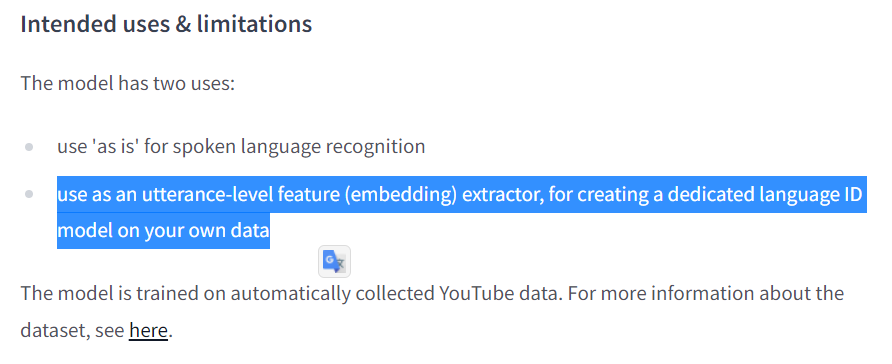

#### 獲取數值

In [ ]:
!pip install numba  # 可以不用執行

In [ ]:
from numba import jit  # 可以不用執行

In [ ]:
@jit # 感覺有加沒加效果差不多，可以去掉
def get_emb(path:str) -> torch.Tensor:
    signal = language_id.load_audio(path)
    emb =  language_id.encode_batch(signal)
    return emb

In [ ]:
# 2hr20min
train_emb = [get_emb(path) for path in np.array(train_dataset["path"])]

In [ ]:
torch.save(train_emb, "tmp/train_emb.pt")

In [ ]:
len(train_emb)

18456

In [ ]:
train_emb[0]

tensor([[[ -0.3734,   5.0749,  -0.6773,   3.3981,  -2.9142,   5.2462,   1.8186,
           -1.5572,  -3.3498,  -6.6761,   1.5243,  -1.5487,  -7.8214,  -1.2099,
            1.4675,   1.2861,   1.7868,   1.9618,   5.4161,  -1.8420,  -0.0122,
            0.1681,   3.0321,   4.4657,   3.1894,  -1.0992,  -0.0814,  -0.1277,
            0.0821,   7.0465,   6.5047,  -1.2428,   3.4461,   2.4386,   4.7278,
            1.9937,  -2.9240,   3.8685,   1.2026,   3.8534,  -3.8022,  -0.8878,
           -0.9122,   0.2482,   0.8744,  -5.2415,   4.7881,  -1.5032,  -3.1907,
            6.1649,  -1.8660,  -0.9155,   3.9147,   8.9191,   9.2359,  -0.4855,
           -3.1973,   6.7578,  -1.4737,   0.4652,   2.1080,   5.7802,   2.3929,
           -9.6668,  -1.4016,  -0.0588,  -3.7325,   2.1131,   9.6816,   4.7523,
            2.8438,  -1.5965,  -0.8283,   0.1031,  -0.4878,   4.7372,   5.1103,
           -1.4319,  -0.8708,   3.6771,  -0.2004,  -0.9490,  -5.9496,  -5.4604,
            1.9042,   2.0757,   1.9693, 

In [ ]:
# 1hr30min
test_emb = [get_emb(path) for path in np.array(test_dataset["path"])]

torch.save(test_emb, "tmp/test_emb.pt")

In [ ]:
# 1hr23min
valid_emb = [get_emb(path) for path in np.array(valid_dataset["path"])]

torch.save(valid_emb, "tmp/valid_emb.pt")